<a href="https://colab.research.google.com/github/surajdusa/Predictive-Modelling-of-Energy-Usage-in-Response-to-Dynamic-Pricing-Signals-in-London-Households/blob/main/EDA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CC_LCL-FullData.csv')

In [ ]:
df.head()

,LCLid,stdorToU,DateTime,KWH/hh (per half hour)
0,MAC000002,Std,2012-10-12 00:30:00.0000000,0
1,MAC000002,Std,2012-10-12 01:00:00.0000000,0
2,MAC000002,Std,2012-10-12 01:30:00.0000000,0
3,MAC000002,Std,2012-10-12 02:00:00.0000000,0
4,MAC000002,Std,2012-10-12 02:30:00.0000000,0


In [ ]:
print('The number of data points in the dataset:', df.shape[0])

The number of data points in the dataset: 167932474


In [ ]:
print('The number of data points in the dataset:', df.shape[1])

The number of data points in the dataset: 4


In [ ]:
df = df.iloc[:2000000]

In [ ]:
print(df.isnull().sum())

LCLid                      0
stdorToU                   0
DateTime                   0
KWH/hh (per half hour)     0
dtype: int64


In [ ]:
df["Date"] = pd.to_datetime(df["DateTime"]).dt.date
df["Time"] = pd.to_datetime(df["DateTime"]).dt.time
df.drop(columns=["DateTime"], inplace=True)

In [ ]:
print('The number of data points in the dataset:', df.shape[0])

The number of data points in the dataset: 2000000


In [ ]:
df.head()

,LCLid,stdorToU,KWH/hh (per half hour),Date,Time
0,MAC000002,Std,0,2012-10-12,00:30:00
1,MAC000002,Std,0,2012-10-12,01:00:00
2,MAC000002,Std,0,2012-10-12,01:30:00
3,MAC000002,Std,0,2012-10-12,02:00:00
4,MAC000002,Std,0,2012-10-12,02:30:00


In [ ]:
print(df.columns.tolist())

['LCLid', 'stdorToU', 'KWH/hh (per half hour)', 'Date', 'Time']


In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
df["KWH/hh (per half hour)"] = pd.to_numeric(df["KWH/hh (per half hour)"], errors="coerce")

In [ ]:
dx = df.groupby("Date")["KWH/hh (per half hour)"].sum().reset_index()
dx.columns = ["Date", "KWH"]

In [ ]:
dx.head(20)

,Date,KWH
0,2011-12-06,2.947000
1,2011-12-07,143.174000
2,2011-12-08,365.577000
3,2011-12-09,502.532000
4,2011-12-10,637.385000
5,2011-12-11,670.710001
6,2011-12-12,614.313000
7,2011-12-13,570.259000
8,2011-12-14,627.398000
9,2011-12-15,643.423001


In [ ]:
dx['Date'] = pd.to_datetime(dx['Date'], errors='coerce')

In [ ]:
dx['year'] = dx['Date'].dt.year
dx['quarter'] = dx['Date'].dt.quarter
dx['month'] = dx['Date'].dt.month
dx['day'] = dx['Date'].dt.day

In [ ]:
dx.head()

,Date,KWH,year,quarter,month,day
0,2011-12-06,2.947,2011,4,12,6
1,2011-12-07,143.174,2011,4,12,7
2,2011-12-08,365.577,2011,4,12,8
3,2011-12-09,502.532,2011,4,12,9
4,2011-12-10,637.385,2011,4,12,10


In [ ]:
import calendar
dx['month'] = dx['month'].apply(lambda x: calendar.month_name[x])

In [ ]:
dx.head()

,Date,KWH,year,quarter,month,day
0,2011-12-06,2.947,2011,4,December,6
1,2011-12-07,143.174,2011,4,December,7
2,2011-12-08,365.577,2011,4,December,8
3,2011-12-09,502.532,2011,4,December,9
4,2011-12-10,637.385,2011,4,December,10


In [ ]:
dx.tail()

,Date,KWH,year,quarter,month,day
811,2014-02-24,620.515001,2014,1,February,24
812,2014-02-25,575.761001,2014,1,February,25
813,2014-02-26,602.744000,2014,1,February,26
814,2014-02-27,605.165001,2014,1,February,27
815,2014-02-28,41.394000,2014,1,February,28


In [ ]:
dx.KWH.describe()

count    816.000000
mean     586.107567
std      125.938950
min        2.947000
25%      482.893750
50%      564.665500
75%      668.310750
max      942.200000
Name: KWH, dtype: float64

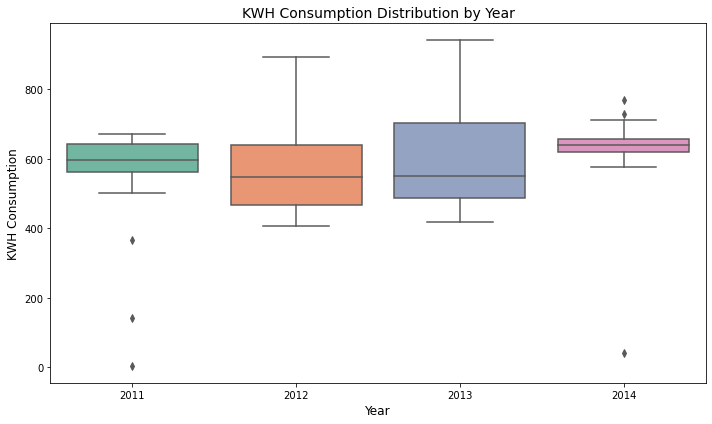

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='KWH', data=dx, palette='Set2')
plt.title("KWH Consumption Distribution by Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("KWH Consumption", fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
Q1 = dx['KWH'].quantile(0.25)
Q3 = dx['KWH'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
dx = dx[(dx['KWH'] >= lower_bound) & (dx['KWH'] <= upper_bound)]

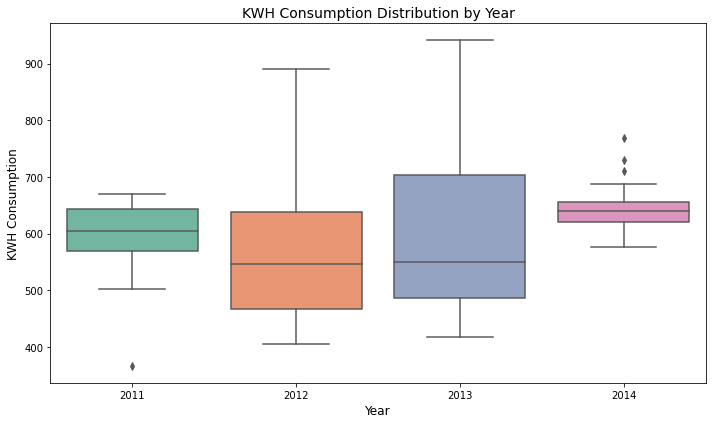

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='KWH', data=dx, palette='Set2')
plt.title("KWH Consumption Distribution by Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("KWH Consumption", fontsize=12)
plt.tight_layout()
plt.show()

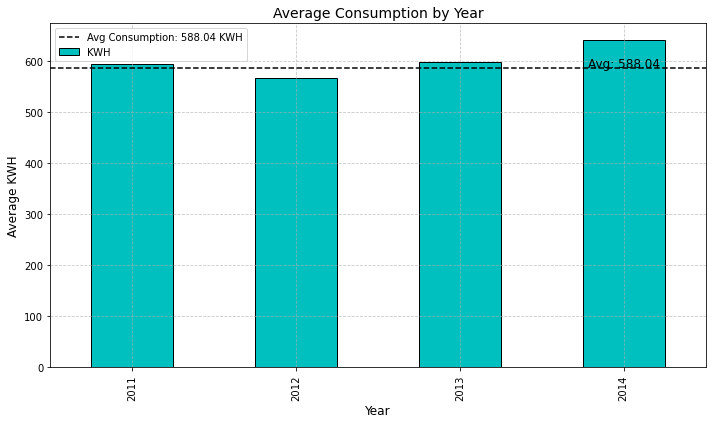

In [ ]:
yearly_avg = dx.groupby('year')['KWH'].mean()
plt.figure(figsize=(10, 6))
yearly_avg.plot(kind='bar', color='c', edgecolor='black')
overall_avg = dx['KWH'].mean()
plt.axhline(y=overall_avg, color='black', linestyle='--', label=f"Avg Consumption: {overall_avg:.2f} KWH")
plt.text(len(yearly_avg) - 1, overall_avg + 0.05, f"Avg: {overall_avg:.2f}", color='black', fontsize=12, ha='center')
plt.title("Average Consumption by Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average KWH", fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

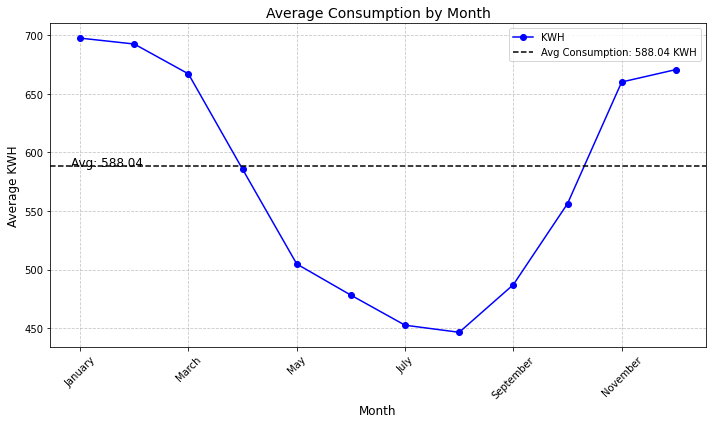

In [ ]:
overall_avg = dx["KWH"].mean()
plt.figure(figsize=(10, 6))
monthly_avg.plot(kind='line', marker='o', color='b')
plt.axhline(y=overall_avg, color='black', linestyle='--', label=f"Avg Consumption: {overall_avg:.2f} KWH")
plt.title("Average Consumption by Month", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average KWH", fontsize=12)
plt.xticks(rotation=45)
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.text(0.5, overall_avg + 0.05, f"Avg: {overall_avg:.2f}", color='black', fontsize=12, ha='center')
plt.legend()
plt.tight_layout()
plt.show()

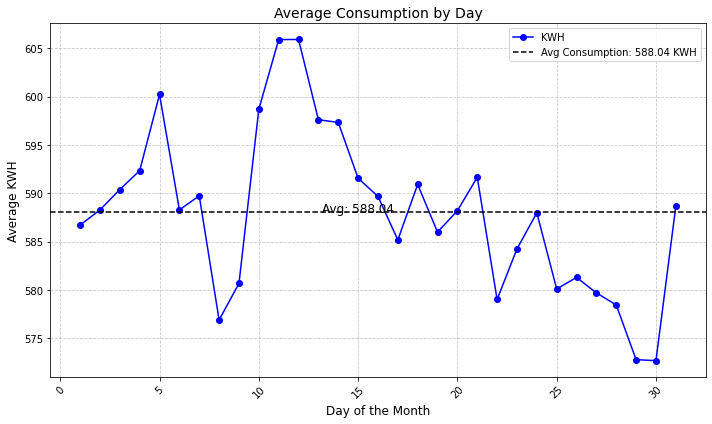

In [ ]:
daily_avg = dx.groupby("day")["KWH"].mean()
overall_avg_day = dx["KWH"].mean()
plt.figure(figsize=(10, 6))
daily_avg.plot(kind='line', marker='o', color='b')
plt.axhline(y=overall_avg_day, color='black', linestyle='--', label=f"Avg Consumption: {overall_avg_day:.2f} KWH")
plt.title("Average Consumption by Day", fontsize=14)
plt.xlabel("Day of the Month", fontsize=12)
plt.ylabel("Average KWH", fontsize=12)
plt.xticks(rotation=45)
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.text(15, overall_avg_day + 0.05, f"Avg: {overall_avg_day:.2f}", color='black', fontsize=12, ha='center')
plt.legend()
plt.tight_layout()
plt.show()